### Installing required libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

### Importing sheet named "Upgrade Units"

In [ ]:
df = pd.read_excel("Sales Segment.xlsx", sheet_name="Upgrade Units")
df.head()

,Month of FiscalDate,Access,CTBH,State,GovEd,GovEd Acc,Healthcare,Healthcare Acc,Hospitality,Hopitality Acc,MidMarket,MidMarket Acc,Strategic,Strategic Acc,Partner,Inside,Other
0,2018-01-01,92.0,121.0,0.0,197.0,52.0,1226.0,3340.0,1963.0,3276.0,1034.0,353.0,4.0,23.0,34.0,161.0,236.0
1,2018-02-01,134.0,207.0,0.0,1366.0,135.0,2381.0,1406.0,6496.0,2540.0,1527.0,1261.0,14.0,94.0,51.0,292.0,126.0
2,2018-03-01,97.0,268.0,0.0,305.0,258.0,1906.0,4918.0,3023.0,1480.0,1965.0,410.0,30.0,64.0,64.0,743.0,612.0
3,2018-04-01,129.0,201.0,0.0,4780.0,1856.0,1612.0,814.0,5791.0,4001.0,1233.0,651.0,6.0,155.0,48.0,880.0,347.0
4,2018-05-01,94.0,177.0,0.0,528.0,1378.0,278.0,3245.0,3718.0,3872.0,1751.0,1085.0,6.0,34.0,85.0,624.0,170.0


## Data Exploration

In [ ]:
df['State'].unique()

array([  0.,   1.,   2., 153.,  nan])

From the above output, we can see that 153 is an outlier that needs to be removed.

In [ ]:
df_153 = df[df.State == 153]
df = df[df.State != 153]

### 1- NaNs?

In [ ]:
df.isna().sum()

Month of FiscalDate     0
Access                 18
CTBH                   18
State                  18
GovEd                  18
GovEd Acc              18
Healthcare             18
Healthcare Acc         18
Hospitality            18
Hopitality Acc         18
MidMarket              18
MidMarket Acc          18
Strategic              18
Strategic Acc          18
Partner                18
Inside                 18
Other                  18
dtype: int64

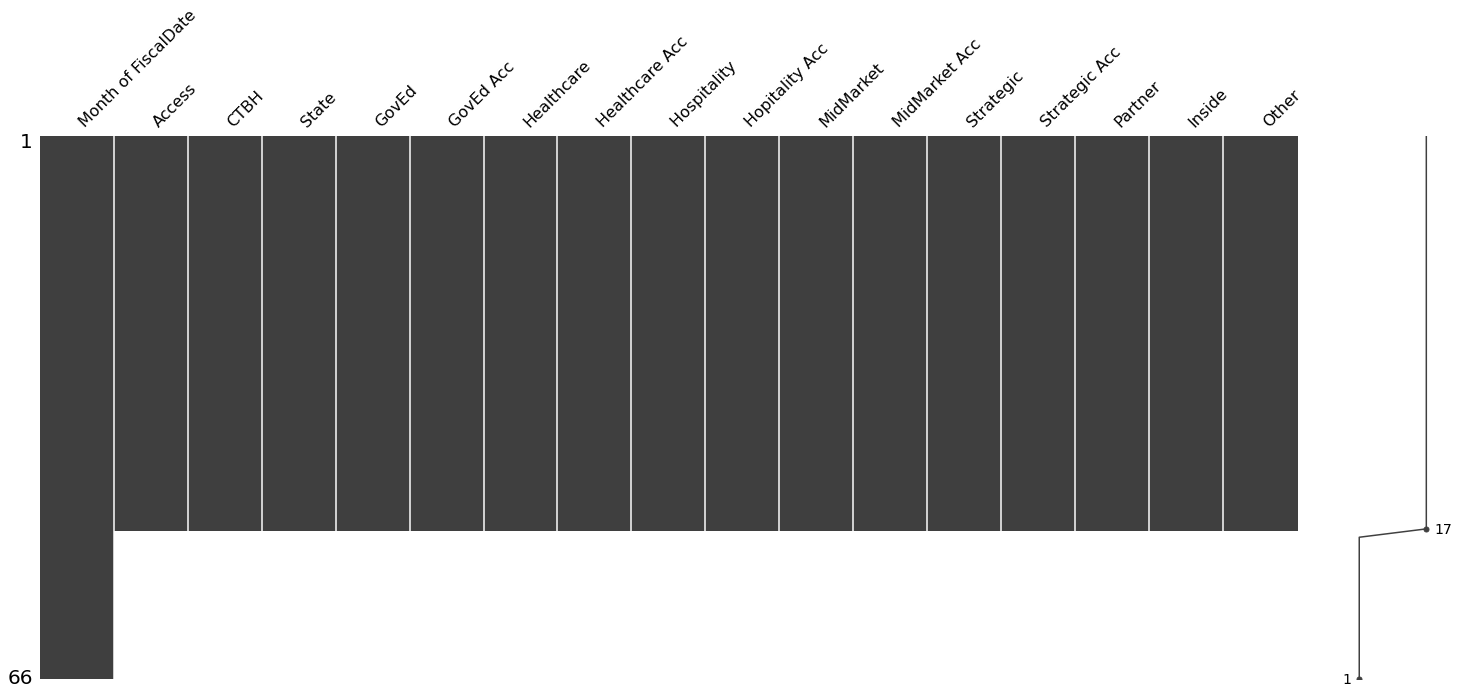

In [ ]:
import missingno as msno
msno.matrix(df)

The above outputs are showing us that only the last 18 values are null because we need to forecast values for those 18 rows (18 different dates/months).

### Treating NaNs

In [ ]:
df_forecast=df[df["State"].isnull()]
df_forecast.head()

,Month of FiscalDate,Access,CTBH,State,GovEd,GovEd Acc,Healthcare,Healthcare Acc,Hospitality,Hopitality Acc,MidMarket,MidMarket Acc,Strategic,Strategic Acc,Partner,Inside,Other
49,2022-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Before dropping nans

In [ ]:
df.shape

(66, 17)

#### After dropping nans

In [ ]:
df_cleaned=df.dropna()
df_cleaned.shape

(48, 17)

### 2- Information about different columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 66
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month of FiscalDate  66 non-null     datetime64[ns]
 1   Access               48 non-null     float64       
 2   CTBH                 48 non-null     float64       
 3   State                48 non-null     float64       
 4   GovEd                48 non-null     float64       
 5   GovEd Acc            48 non-null     float64       
 6   Healthcare           48 non-null     float64       
 7   Healthcare Acc       48 non-null     float64       
 8   Hospitality          48 non-null     float64       
 9   Hopitality Acc       48 non-null     float64       
 10  MidMarket            48 non-null     float64       
 11  MidMarket Acc        48 non-null     float64       
 12  Strategic            48 non-null     float64       
 13  Strategic Acc        48 non-null     

From the above output, we can see that, only column "Month of FiscalDate" is of **datetime64** format and all other are of **float64** type.

### 3- Some mathematical exploration of columns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Access,48.0,128.125000,27.301800,80.0,110.50,127.5,139.25,200.0
CTBH,48.0,242.604167,149.333233,58.0,163.75,206.0,288.00,1016.0
State,48.0,0.104167,0.424744,0.0,0.00,0.0,0.00,2.0
GovEd,48.0,1552.041667,1296.177719,122.0,554.00,1236.5,2091.25,5806.0
GovEd Acc,48.0,652.666667,2122.285383,1.0,34.00,128.0,337.00,12947.0
Healthcare,48.0,3731.166667,2684.729182,278.0,1581.50,3268.5,5338.75,11849.0
Healthcare Acc,48.0,1515.416667,1325.248220,45.0,449.25,956.0,2718.00,4918.0
Hospitality,48.0,4316.645833,1814.276135,940.0,2850.00,4410.0,5511.25,9860.0
Hopitality Acc,48.0,1655.729167,1301.065664,4.0,670.75,1396.0,2320.50,6103.0
MidMarket,48.0,2794.395833,1095.510563,1034.0,1928.00,2662.5,3668.75,4815.0


The above output shows us count, mean, standard deviation, minimum, 25%, 50%, 75%, and maximum of all the columns.

### 4- Continuous, non-Continuous, and Categorical variables

In [ ]:
df_cleaned.columns

Index(['Month of FiscalDate', 'Access', 'CTBH', 'State', 'GovEd', 'GovEd Acc',
       'Healthcare', 'Healthcare Acc', 'Hospitality ', 'Hopitality Acc',
       'MidMarket', 'MidMarket Acc', 'Strategic', 'Strategic Acc', 'Partner',
       'Inside', 'Other'],
      dtype='object')

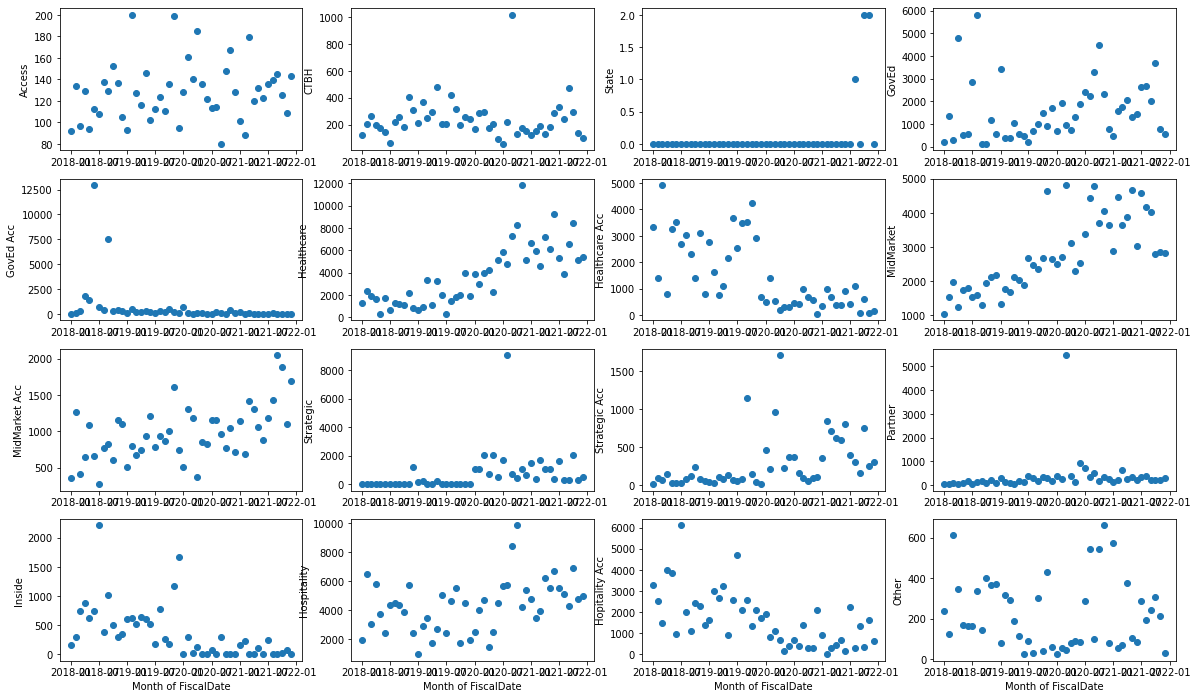

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,4, figsize=(20,12))
ax[0,0].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['Access'])
ax[0,0].set_ylabel("Access")

ax[0,1].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['CTBH'])
ax[0,1].set_ylabel("CTBH")

ax[0,2].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['State'])
ax[0,2].set_ylabel("State")

ax[0,3].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['GovEd'])
ax[0,3].set_ylabel("GovEd")

ax[1,0].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['GovEd Acc'])
ax[1,0].set_ylabel("GovEd Acc")

ax[1,1].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['Healthcare'])
ax[1,1].set_ylabel("Healthcare")

ax[1,2].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['Healthcare Acc'])
ax[1,2].set_ylabel("Healthcare Acc")

ax[1,3].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['MidMarket'])
ax[1,3].set_ylabel("MidMarket")

ax[2,0].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['MidMarket Acc'])
ax[2,0].set_ylabel("MidMarket Acc")

ax[2,1].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['Strategic'])
ax[2,1].set_ylabel("Strategic")

ax[2,2].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['Strategic Acc'])
ax[2,2].set_ylabel("Strategic Acc")

ax[2,3].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['Partner'])
ax[2,3].set_ylabel("Partner")

ax[3,0].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['Inside'])
ax[3,0].set_xlabel("Month of FiscalDate")
ax[3,0].set_ylabel("Inside")

ax[3,1].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['Hospitality '])
ax[3,1].set_xlabel("Month of FiscalDate")
ax[3,1].set_ylabel("Hospitality")

ax[3,2].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['Hopitality Acc'])
ax[3,2].set_xlabel("Month of FiscalDate")
ax[3,2].set_ylabel("Hopitality Acc")

ax[3,3].scatter(x = df_cleaned['Month of FiscalDate'], y = df_cleaned['Other'])
ax[3,3].set_xlabel("Month of FiscalDate")
ax[3,3].set_ylabel("Other")

plt.show()

From the above output, we can see that column 'State' is non-continuous variable. And othere columns are continuous.

### 5- Outlier Detection

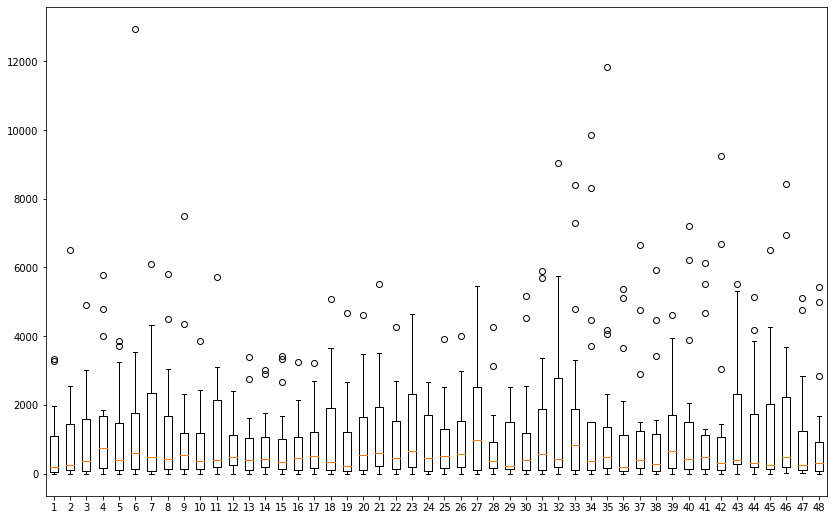

In [ ]:
df_cleaned_numeric=df_cleaned.drop(['Month of FiscalDate'], axis='columns')
plt.figure(figsize=(14,9))
plt.boxplot(df_cleaned_numeric)
plt.show()

From the above boxplots of various columns/variables, we can see that there are some outliers present in majority columns. We will not try to treat these columns because of the reason that we have a very small amount of data.

### 6- Trends of different variables/columns

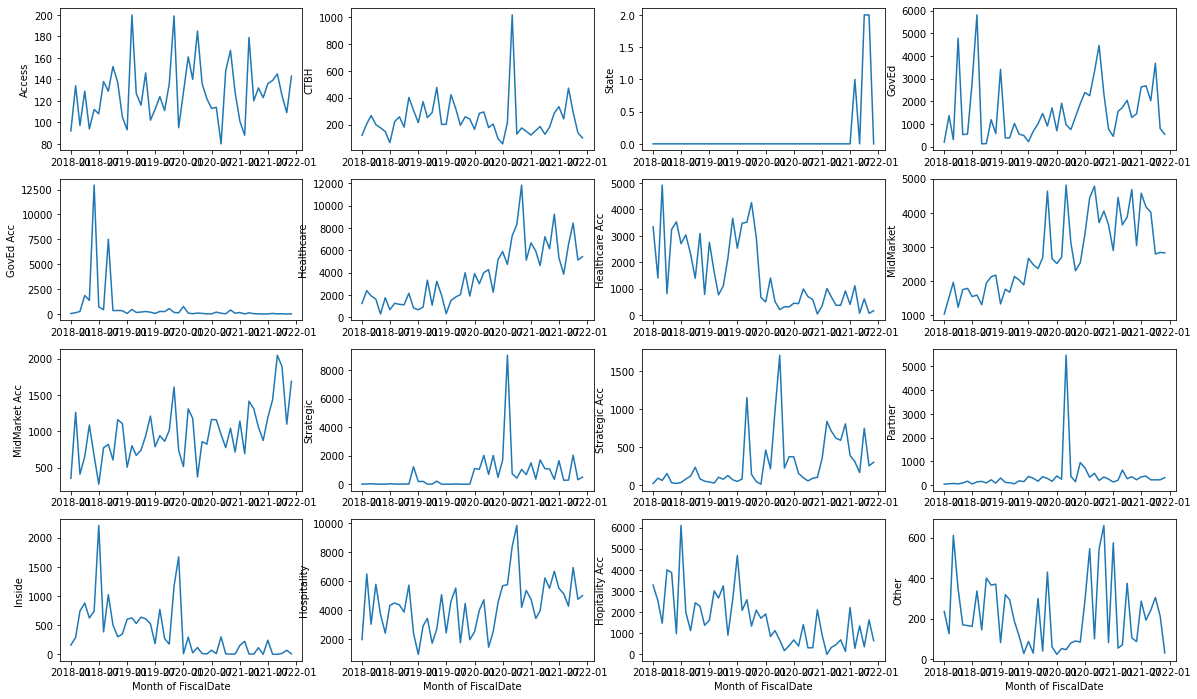

In [ ]:
fig, ax = plt.subplots(4,4, figsize=(20,12))

ax[0,0].plot(df_cleaned['Month of FiscalDate'], df_cleaned['Access'])
ax[0,0].set_ylabel("Access")

ax[0,1].plot(df_cleaned['Month of FiscalDate'], df_cleaned['CTBH'])
ax[0,1].set_ylabel("CTBH")

ax[0,2].plot(df_cleaned['Month of FiscalDate'], df_cleaned['State'])
ax[0,2].set_ylabel("State")

ax[0,3].plot(df_cleaned['Month of FiscalDate'], df_cleaned['GovEd'])
ax[0,3].set_ylabel("GovEd")

ax[1,0].plot(df_cleaned['Month of FiscalDate'], df_cleaned['GovEd Acc'])
ax[1,0].set_ylabel("GovEd Acc")

ax[1,1].plot(df_cleaned['Month of FiscalDate'], df_cleaned['Healthcare'])
ax[1,1].set_ylabel("Healthcare")

ax[1,2].plot(df_cleaned['Month of FiscalDate'], df_cleaned['Healthcare Acc'])
ax[1,2].set_ylabel("Healthcare Acc")

ax[1,3].plot(df_cleaned['Month of FiscalDate'], df_cleaned['MidMarket'])
ax[1,3].set_ylabel("MidMarket")

ax[2,0].plot(df_cleaned['Month of FiscalDate'], df_cleaned['MidMarket Acc'])
ax[2,0].set_ylabel("MidMarket Acc")

ax[2,1].plot(df_cleaned['Month of FiscalDate'], df_cleaned['Strategic'])
ax[2,1].set_ylabel("Strategic")

ax[2,2].plot(df_cleaned['Month of FiscalDate'], df_cleaned['Strategic Acc'])
ax[2,2].set_ylabel("Strategic Acc")

ax[2,3].plot(df_cleaned['Month of FiscalDate'], df_cleaned['Partner'])
ax[2,3].set_ylabel("Partner")

ax[3,0].plot(df_cleaned['Month of FiscalDate'], df_cleaned['Inside'])
ax[3,0].set_xlabel("Month of FiscalDate")
ax[3,0].set_ylabel("Inside")

ax[3,1].plot(df_cleaned['Month of FiscalDate'], df_cleaned['Hospitality '])
ax[3,1].set_xlabel("Month of FiscalDate")
ax[3,1].set_ylabel("Hospitality")

ax[3,2].plot(df_cleaned['Month of FiscalDate'], df_cleaned['Hopitality Acc'])
ax[3,2].set_xlabel("Month of FiscalDate")
ax[3,2].set_ylabel("Hopitality Acc")

ax[3,3].plot(df_cleaned['Month of FiscalDate'], df_cleaned['Other'])
ax[3,3].set_xlabel("Month of FiscalDate")
ax[3,3].set_ylabel("Other")

plt.show()

From the above line charts, we can see trend of different columns/variables. Whether the trend is continuously increasing, decreasing, or it is moving with constant value.

### 7- Seasonality

In time series data, **seasonality** is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly. Seasonality may be caused by various factors, such as weather, vacation, and holidays and consists of periodic, repetitive, and generally regular and predictable patterns in the levels of a time series.

#### The following graphical techniques can be used to detect seasonality:

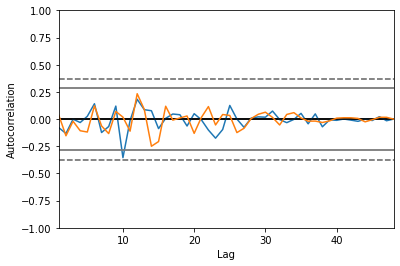

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_cleaned['Access'])
autocorrelation_plot(df_cleaned['CTBH'])
plt.show()

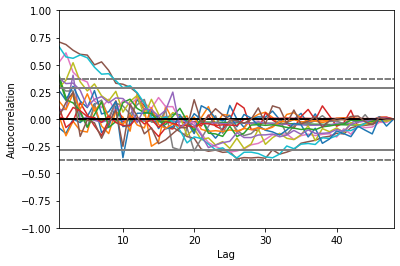

In [ ]:
for variable in df_cleaned_numeric.columns:
    ax = autocorrelation_plot(df_cleaned_numeric[variable])

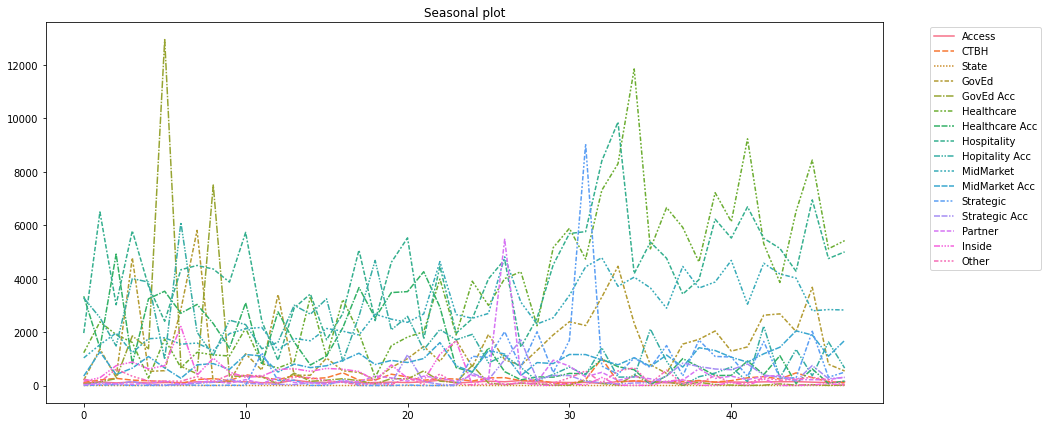

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.lineplot(data=df_cleaned)
# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
y=df_cleaned[['Month of FiscalDate', 'Access']]
y = df_cleaned.set_index('Month of FiscalDate')
y.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Month of FiscalDate', freq=None)

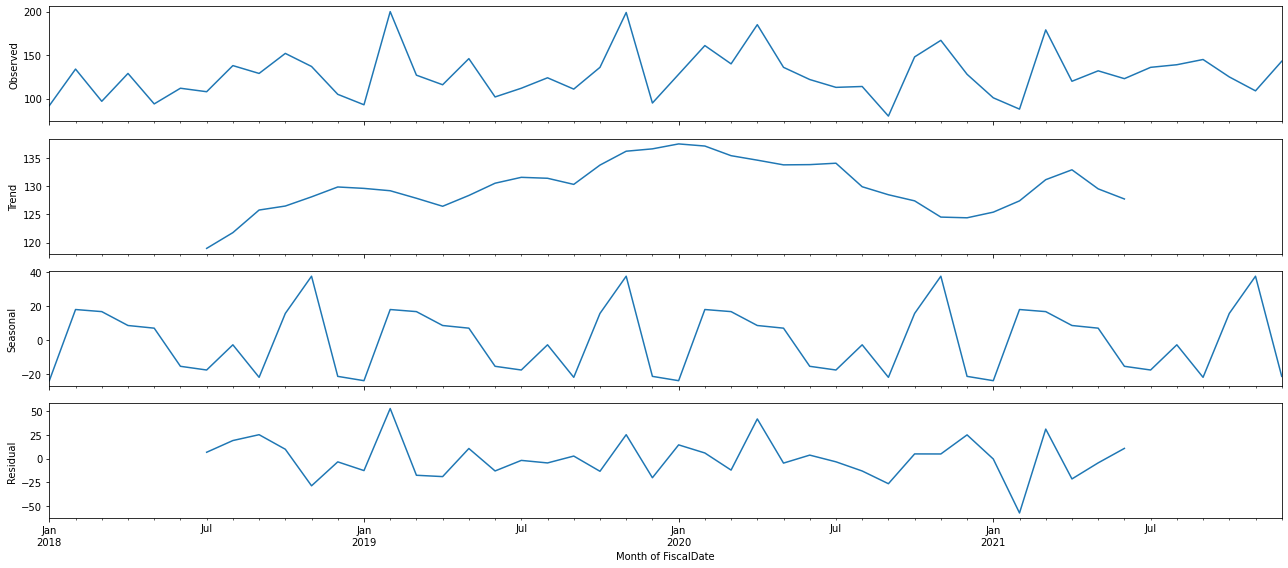

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y[['Access']], model='additive')
fig = decomposition.plot()
plt.show()

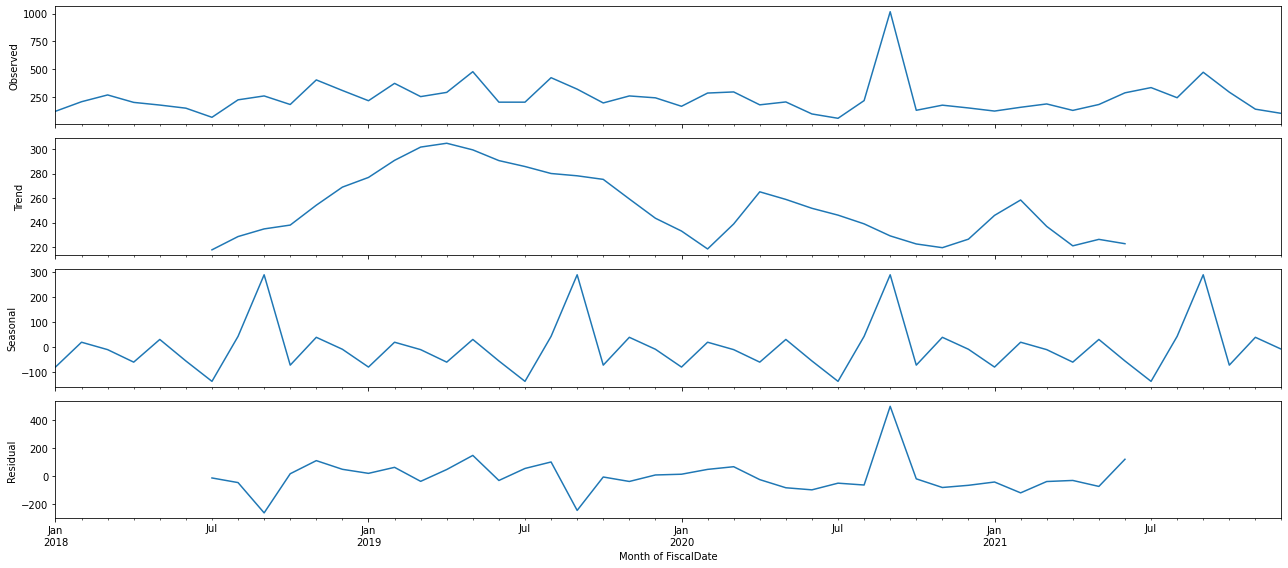

In [ ]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y[['CTBH']], model='additive')
fig = decomposition.plot()
plt.show()

Similar to the above output, we can also plot for all the other columns.

## Forecasting

### Assuming that all the variables/columns are dependent to each other.

In [ ]:
df_cleaned.index=df_cleaned['Month of FiscalDate']
df_cleaned=df_cleaned.drop(['Month of FiscalDate'], axis='columns')
train = df_cleaned[:int((len(df_cleaned)))]
valid = df_cleaned[:int((len(df_cleaned)))]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
cols=df_cleaned.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,16):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('RMSE value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

RMSE value for Access is :  26.859906309913605
RMSE value for CTBH is :  147.29511960629026
RMSE value for State is :  0.4357956499580155
RMSE value for GovEd is :  1292.5020749780185
RMSE value for GovEd Acc is :  2170.91816167398
RMSE value for Healthcare is :  3091.1571717450024
RMSE value for Healthcare Acc is :  1438.7832560713161
RMSE value for Hospitality  is :  1859.6544014217227
RMSE value for Hopitality Acc is :  1440.7240936392802
RMSE value for MidMarket is :  1304.4998026321725
RMSE value for MidMarket Acc is :  411.5469464868653
RMSE value for Strategic is :  1466.2291650845575
RMSE value for Strategic Acc is :  376.8408090892638
RMSE value for Partner is :  788.8860056183028
RMSE value for Inside is :  493.20949731366454
RMSE value for Other is :  171.48835634052148


In [ ]:
df_forecast.index=df_forecast['Month of FiscalDate']
df_forecast=df_forecast.drop(['Month of FiscalDate'], axis='columns')

train = df_cleaned[:int(0.8*(len(df_cleaned)))]
valid = df_forecast

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
prediction

array([[ 1.52786429e+02,  7.08091995e+01,  0.00000000e+00,
         3.07931113e+03,  1.50927671e+01,  7.19974111e+03,
         2.55578090e+02,  4.30892319e+03, -3.47852210e+02,
         4.23148697e+03,  1.04311763e+03,  3.28034849e+03,
         3.29069863e+02,  3.94353248e+02,  1.27649702e+02,
         2.49072582e+02],
       [ 1.31939929e+02,  3.59549284e+02,  0.00000000e+00,
         1.85006193e+03, -3.40867233e+02,  7.29529623e+03,
        -1.85592310e+02,  5.67144160e+03,  5.88121642e+02,
         4.73228100e+03,  1.09922043e+03,  2.60946411e+03,
         3.10907642e+02,  1.15973130e+03,  2.45739172e+02,
         2.10059489e+02],
       [ 1.26722243e+02,  2.92275894e+02,  0.00000000e+00,
         2.36943128e+03, -1.08334010e+03,  7.47742607e+03,
        -1.35096436e+01,  5.78273240e+03,  3.76679763e+02,
         4.27486221e+03,  8.50654427e+02,  1.78381774e+03,
         5.26797768e+02,  6.44367477e+02,  1.82988198e+00,
         2.56775424e+02],
       [ 1.35709026e+02,  2.23254850e

In [ ]:
j=0
for i in df_forecast:
    df_forecast[i] = prediction[:, j]
    j+=1
df_forecast=df_forecast.astype("int")
df_forecast

,Access,CTBH,State,GovEd,GovEd Acc,Healthcare,Healthcare Acc,Hospitality,Hopitality Acc,MidMarket,MidMarket Acc,Strategic,Strategic Acc,Partner,Inside,Other
Month of FiscalDate,,,,,,,,,,,,,,,,
2022-02-01,152,70,0,3079,15,7199,255,4308,-347,4231,1043,3280,329,394,127,249
2022-03-01,131,359,0,1850,-340,7295,-185,5671,588,4732,1099,2609,310,1159,245,210
2022-04-01,126,292,0,2369,-1083,7477,-13,5782,376,4274,850,1783,526,644,1,256
2022-05-01,135,223,0,2428,-703,7814,84,5718,-12,4114,1025,2170,364,482,-154,324
2022-06-01,126,254,0,1869,-387,7620,118,5588,265,4352,1041,2255,310,698,1,302
2022-07-01,124,257,0,2233,-611,7581,74,5621,402,4306,947,2091,381,554,36,285
2022-08-01,128,249,0,2389,-523,7679,123,5737,244,4253,989,2163,330,519,-18,297
2022-09-01,127,255,0,2211,-445,7731,120,5813,319,4315,1007,2169,317,604,16,308
2022-10-01,125,253,0,2277,-516,7702,103,5756,368,4296,972,2108,342,551,22,305


### Forecast of some columns

In [ ]:
df_copy = df_cleaned.copy()
concat_df = pd.concat([df_copy, df_153, df_forecast], axis='rows')
print(concat_df.shape)
concat_df.head()

(66, 16)


,Access,CTBH,State,GovEd,GovEd Acc,Healthcare,Healthcare Acc,Hospitality,Hopitality Acc,MidMarket,MidMarket Acc,Strategic,Strategic Acc,Partner,Inside,Other
Month of FiscalDate,,,,,,,,,,,,,,,,
2018-01-01,92.0,121.0,0.0,197.0,52.0,1226.0,3340.0,1963.0,3276.0,1034.0,353.0,4.0,23.0,34.0,161.0,236.0
2018-02-01,134.0,207.0,0.0,1366.0,135.0,2381.0,1406.0,6496.0,2540.0,1527.0,1261.0,14.0,94.0,51.0,292.0,126.0
2018-03-01,97.0,268.0,0.0,305.0,258.0,1906.0,4918.0,3023.0,1480.0,1965.0,410.0,30.0,64.0,64.0,743.0,612.0
2018-04-01,129.0,201.0,0.0,4780.0,1856.0,1612.0,814.0,5791.0,4001.0,1233.0,651.0,6.0,155.0,48.0,880.0,347.0
2018-05-01,94.0,177.0,0.0,528.0,1378.0,278.0,3245.0,3718.0,3872.0,1751.0,1085.0,6.0,34.0,85.0,624.0,170.0


In [ ]:
concat_df.to_excel("Multivariate-Forecast.xlsx")

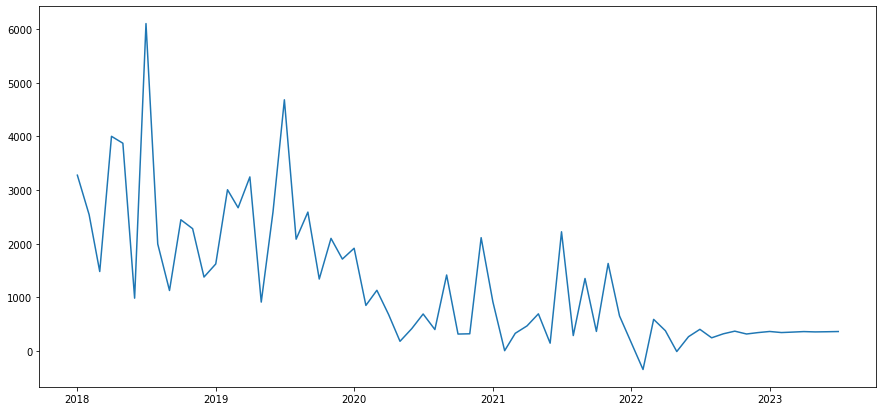

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(concat_df['Hopitality Acc'])

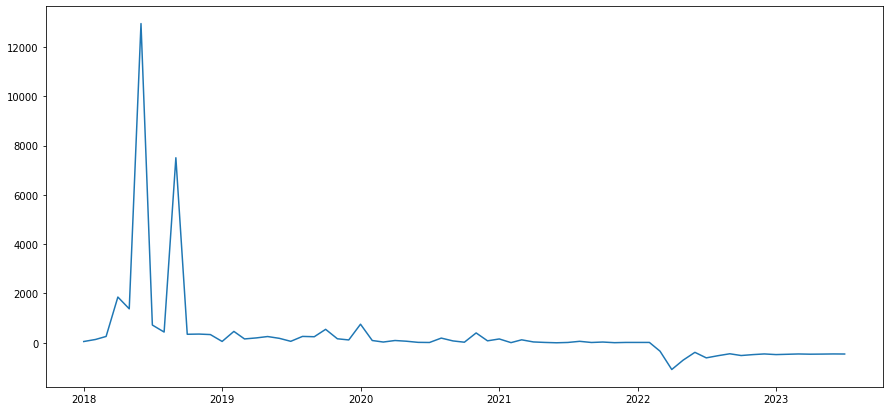

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(concat_df['GovEd Acc'])

It is near impossible to calculate the accurate forecast despite the availability of multiple forecasting methods. There are various **Negative forecaste values**, this is because there can be situations where there services/products were bought but were returned or not completely paid. Which will result in a negative values.

For example, **GovEd** is an interdisciplinary media, education, communications & technology company, with three distinct areas of operation: GovEd Digital Media Productions, GovEd Consulting, and GovEd Ventures. Some forecast values are negative for GovEd, there can be situations where there services where ordered but either never used or never paid, which will result in a negative value.

### What if the variables are not dependent on each other?

In that case, we will implement the below cells of code.

We are using Facebook's Prophet to forecast different variables.

#### But why should we use Prophet?

- Prophet allows adjustment of parameters, customized seasonality components which may improve the forecasts. 
- Prophet can also handle outliers and handles other data issues by itself. 
- Fitting of the model is fast.
- Intuitive hyper parameters which are easy to tune.


In [ ]:
df_cleaned_uni =df.dropna()
print("Shape:", df_cleaned_uni.shape)
df_cleaned_uni.head()

Shape: (48, 17)


,Month of FiscalDate,Access,CTBH,State,GovEd,GovEd Acc,Healthcare,Healthcare Acc,Hospitality,Hopitality Acc,MidMarket,MidMarket Acc,Strategic,Strategic Acc,Partner,Inside,Other
0,2018-01-01,92.0,121.0,0.0,197.0,52.0,1226.0,3340.0,1963.0,3276.0,1034.0,353.0,4.0,23.0,34.0,161.0,236.0
1,2018-02-01,134.0,207.0,0.0,1366.0,135.0,2381.0,1406.0,6496.0,2540.0,1527.0,1261.0,14.0,94.0,51.0,292.0,126.0
2,2018-03-01,97.0,268.0,0.0,305.0,258.0,1906.0,4918.0,3023.0,1480.0,1965.0,410.0,30.0,64.0,64.0,743.0,612.0
3,2018-04-01,129.0,201.0,0.0,4780.0,1856.0,1612.0,814.0,5791.0,4001.0,1233.0,651.0,6.0,155.0,48.0,880.0,347.0
4,2018-05-01,94.0,177.0,0.0,528.0,1378.0,278.0,3245.0,3718.0,3872.0,1751.0,1085.0,6.0,34.0,85.0,624.0,170.0


#### For column 'Access'

#### Tuning parameters

In [ ]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
l=[]
for i in [0.01, 0.04, 0.1, 0.3, 0.6, 0.8, 1]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Access']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Access'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[329.43186109993275, 272.5617564899149, 280.3559944019357, 274.7117570431999, 269.9504236889898, 269.801445602528, 270.18885215589296]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Access']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Access'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[215.97041932724588, 99.53170990503038, 84.02437827861323, 78.89660113147036, 76.85906924590502, 75.98963322252936, 75.74251413956537]


In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Access']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Access'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[274.7334575681415, 273.230248527481, 161.40676063887753, 33.30923289113325, 9.612428531843811, 78.96459665433639]


SO, finally we have found our values for different hyper-parameters.

#### Access

In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['Access']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['Access'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting Access
future_access=pd.DataFrame()
future_access['ds']=df[df["State"].isnull()]['Month of FiscalDate']
forecast_Access = model.predict(future_access)

# Creating dataframe to save the forecast
forecast_univ=pd.DataFrame()
forecast_univ['Access']=forecast_Access['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 9.612428531843811
Forecast Error: 0.0021808725920308804


#### CTBH

In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['CTBH']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['CTBH'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting CTBH
future_CTBH=pd.DataFrame()
future_CTBH['ds']=df[df["State"].isnull()]['Month of FiscalDate']
forecast_CTBH = model.predict(future_CTBH)

forecast_univ['CTBH']=forecast_CTBH['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 31.435448247657185
Forecast Error: 0.0031974950073362153


#### State

In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['State']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['State'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting State
future_State=pd.DataFrame()
future_State['ds']=df[df["State"].isnull()]['Month of FiscalDate']
forecast_State = model.predict(future_State)

forecast_univ['State']=forecast_State['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 0.0013115531292158297
Forecast Error: 4.5531784978417035e-06


#### GovEd

In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['GovEd']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['GovEd'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[2589583.760769749, 2567732.8470249097, 2538345.705407138, 347105.1326601237, 208.60539412271743, 203150.52999212217]


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['GovEd']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['GovEd'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting GovEd
future_GovEd=pd.DataFrame()
future_GovEd['ds']=df[df["GovEd"].isnull()]['Month of FiscalDate']
forecast_GovEd = model.predict(future_GovEd)

forecast_univ['GovEd']=forecast_GovEd['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 208.60539412271743
Forecast Error: -1.0487123632834254


#### GovEd Acc

In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['GovEd Acc']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['GovEd Acc'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting GovEd Acc
future_GovEd_Acc=pd.DataFrame()
future_GovEd_Acc['ds']=df[df["GovEd Acc"].isnull()]['Month of FiscalDate']
forecast_GovEd_Acc = model.predict(future_GovEd_Acc)

forecast_univ['GovEd Acc']=forecast_GovEd_Acc['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 0.004266244277105268
Forecast Error: -0.0027312971791985776


#### Healthcare

In [ ]:
l=[]
for i in [0.01, 0.04, 0.1, 0.3, 0.6, 0.8, 1]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Healthcare']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Healthcare'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[887083.6223401806, 921315.4994474966, 960003.8946296216, 936773.0149856161, 890279.5645173915, 875936.4981683905, 865489.9066697937]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Healthcare']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Healthcare'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[365904.19268005167, 107743.69704128787, 21976.228228019325, 17575.6715530443, 16463.98818846749, 16054.284538852826, 15920.720370494199]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Healthcare']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Healthcare'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[329879.9911181148, 15559.824405422507, 9549.042417997589, 7594.899382970738, 6682.934636877219, 6223.096372688485, 5911.969002664526]


In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Healthcare']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Healthcare'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[937076.7988994917, 906311.5942174487, 465130.081202387, 97460.41240900275, 53384.05357478223, 75563.30240013578]


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['Healthcare']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, changepoint_prior_scale=100)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['Healthcare'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting Healthcare
future_Healthcare=pd.DataFrame()
future_Healthcare['ds']=df[df["Healthcare"].isnull()]['Month of FiscalDate']
forecast_Healthcare = model.predict(future_Healthcare)

forecast_univ['Healthcare']=forecast_Healthcare['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE: 5911.969002664526
Forecast Error: -0.8356890318005867


#### Healthcare Acc

In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['Healthcare Acc']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['Healthcare Acc'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting Healthcare Acc
future_Healthcare_Acc=pd.DataFrame()
future_Healthcare_Acc['ds']=df[df["Healthcare Acc"].isnull()]['Month of FiscalDate']
forecast_Healthcare_Acc = model.predict(future_Healthcare_Acc)

forecast_univ['Healthcare Acc']=forecast_Healthcare_Acc['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 1823.2001137774187
Forecast Error: -0.20138598363644178


#### Hospitality

In [ ]:
df_cleaned_uni.columns

Index(['Month of FiscalDate', 'Access', 'CTBH', 'State', 'GovEd', 'GovEd Acc',
       'Healthcare', 'Healthcare Acc', 'Hospitality ', 'Hopitality Acc',
       'MidMarket', 'MidMarket Acc', 'Strategic', 'Strategic Acc', 'Partner',
       'Inside', 'Other'],
      dtype='object')

In [ ]:
l=[]
for i in [0.01, 0.04, 0.1, 0.3, 0.6, 0.8, 1]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Hospitality ']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Hospitality '].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[2114717.5242551547, 1992059.8916811054, 2128887.405222451, 2175403.3901179666, 2152181.538975772, 2145404.468120899, 2144567.8060878715]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Hospitality ']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Hospitality '].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[1530977.456678055, 1112885.9294122194, 965709.6614333224, 921656.7494490088, 903817.6307552934, 896478.434713744, 894469.218093625]


In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Hospitality ']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Hospitality '].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[2168742.1816337304, 2169831.598724157, 1613073.7080447827, 300428.3943871822, 238615.12808734848, 24773.687969719515]


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['Hospitality ']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=0.9)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['Hospitality '].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting Hospitality
future_Hospitality=pd.DataFrame()
future_Hospitality['ds']=df[df["Hospitality "].isnull()]['Month of FiscalDate']
forecast_Hospitality = model.predict(future_Hospitality)

forecast_univ['Hospitality ']=forecast_Hospitality['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE: 24773.687969719515
Forecast Error: -19.30024050317561


#### Hopitality Acc

In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['Hopitality Acc']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['Hopitality Acc'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting Hopitality Acc
future_Hopitality_Acc=pd.DataFrame()
future_Hopitality_Acc['ds']=df[df["Hopitality Acc"].isnull()]['Month of FiscalDate']
forecast_Hopitality_Acc = model.predict(future_Hopitality_Acc)

forecast_univ['Hopitality Acc']=forecast_Hopitality_Acc['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 356.59639454565865
Forecast Error: 0.02248921695352237


#### MidMarket

In [ ]:
l=[]
for i in [0.01, 0.04, 0.1, 0.3, 0.6, 0.8, 1]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['MidMarket']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['MidMarket'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[85708.7067054687, 122475.96625837809, 141148.82404763743, 134612.88393241918, 115927.11417758875, 109367.70842116966, 105878.55106096897]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.01, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['MidMarket']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['MidMarket'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[75112.1518359656, 62653.5405369551, 51891.144976537085, 50263.852492345824, 47460.679488496375, 45556.27698841256, 45034.73352636475]


In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['MidMarket']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['MidMarket'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[134358.43000594413, 131667.48255950294, 130295.87461654896, 59721.96776403893, 3349.0526374994965, 35685.620238753865]


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['MidMarket']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['MidMarket'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting MidMarket
future_MidMarket=pd.DataFrame()
future_MidMarket['ds']=df[df["MidMarket"].isnull()]['Month of FiscalDate']
forecast_MidMarket = model.predict(future_MidMarket)

forecast_univ['MidMarket ']=forecast_MidMarket['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 3349.0526374994965
Forecast Error: 3.1048373223565817


#### MidMarket Acc

In [ ]:
l=[]
for i in [0.01, 0.04, 0.1, 0.3, 0.6, 0.8, 1]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['MidMarket Acc']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['MidMarket Acc'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[82892.39466159308, 63937.98762489295, 62242.09057555513, 61064.579776530794, 59033.29509666746, 58286.75930790023, 57857.52168469145]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=1, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['MidMarket Acc']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['MidMarket Acc'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[56045.80718971485, 41790.67179490237, 21051.984320165637, 18580.028694694185, 17727.41642044589, 17214.235851781417, 17012.327067499333]


In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=1, changepoint_prior_scale=100, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['MidMarket Acc']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['MidMarket Acc'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[57888.67237521481, 57558.14133053704, 36813.57133020929, 15700.219133862576, 2903.920946799068, 8647.958649107188]


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['MidMarket Acc']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=1, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['MidMarket Acc'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting MidMarket Acc
future_MidMarket_Acc=pd.DataFrame()
future_MidMarket_Acc['ds']=df[df["MidMarket Acc"].isnull()]['Month of FiscalDate']
forecast_MidMarket_Acc = model.predict(future_MidMarket_Acc)

forecast_univ['MidMarket Acc']=forecast_MidMarket_Acc['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 2903.920946799068
Forecast Error: -0.4216111951857101


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['MidMarket Acc']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.03, changepoint_prior_scale=100, changepoint_range=0.9)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['MidMarket Acc'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting MidMarket Acc
future_MidMarket_Acc=pd.DataFrame()
future_MidMarket_Acc['ds']=df[df["MidMarket Acc"].isnull()]['Month of FiscalDate']
forecast_MidMarket_Acc = model.predict(future_MidMarket_Acc)

forecast_univ['MidMarket Acc']=forecast_MidMarket_Acc['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE: 41803.73568532171
Forecast Error: -11.183878662543055


#### Strategic

In [ ]:
l=[]
for i in [0.01, 0.04, 0.1, 0.3, 0.6, 0.8, 1]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Strategic']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Strategic'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[28199.517846096227, 234186.87531001345, 317853.1748798309, 281744.748909696, 186019.96126644104, 152133.7223645042, 133594.7929531008]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=1, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Strategic']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Strategic'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[88541.97187314436, 45953.278991839106, 40740.83606917023, 38771.62422092377, 37733.217462019056, 37077.40147404829, 36872.80497649791]


In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=1, changepoint_prior_scale=100, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Strategic']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Strategic'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[134399.0466792343, 134075.48926759764, 131297.47976101554, 21933.959770794514, 2289.0050997766148, 40516.40607518125]


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['Strategic']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.5, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['Strategic'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting Strategic
future_Strategic=pd.DataFrame()
future_Strategic['ds']=df[df["Strategic"].isnull()]['Month of FiscalDate']
forecast_Strategic = model.predict(future_Strategic)

forecast_univ['Strategic']=forecast_Strategic['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 13805.2796615417
Forecast Error: 0.015011260810155136


#### Strategic Acc

In [ ]:
l=[]
for i in [0.01, 0.04, 0.1, 0.3, 0.6, 0.8, 1]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Strategic Acc']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Strategic Acc'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[2297.1729291014954, 6848.368277533254, 13368.995460067152, 15364.847924642145, 16005.681882705356, 16566.77578103479, 17071.23533046566]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.01, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Strategic Acc']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Strategic Acc'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[3196.3405580994495, 2286.610700210749, 2198.2552061975393, 1756.7666391465384, 1431.269215866831, 1230.528094234428, 1173.6725482127333]


In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=1, changepoint_prior_scale=100, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Strategic Acc']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Strategic Acc'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[17066.382737045158, 16781.601483459763, 13600.571371195332, 6164.65063207381, 219.15634623333148, 2530.799918433745]


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['Strategic Acc']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=1, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['Strategic Acc'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting Strategic
future_Strategic_Acc=pd.DataFrame()
future_Strategic_Acc['ds']=df[df["Strategic"].isnull()]['Month of FiscalDate']
forecast_Strategic_Acc = model.predict(future_Strategic_Acc)

forecast_univ['Strategic Acc']=forecast_Strategic_Acc['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 219.15634623333148
Forecast Error: -0.7926837524581088


#### Partner

In [ ]:
l=[]
for i in [0.01, 0.04, 0.1, 0.3, 0.6, 0.8, 1]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Partner']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Partner'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[23532.10535048743, 126060.5283162056, 164385.1271568535, 145111.87038148945, 104633.11638163221, 93987.85790463645, 88353.73072302337]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.01, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Partner']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Partner'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[10831.942136214482, 12128.430925750947, 12688.411874095424, 12793.980048671796, 12835.947221155131, 12814.100682378867, 12764.120460488348]


In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.01, changepoint_prior_scale=100, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Partner']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Partner'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[22958.734629469902, 22907.46543348897, 17708.881657118713, 14392.549869363624, 4569.307987084885, 8933.961196120457]


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['Partner']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['Partner'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting Strategic
future_Partner=pd.DataFrame()
future_Partner['ds']=df[df["Strategic"].isnull()]['Month of FiscalDate']
forecast_Partner = model.predict(future_Partner)

forecast_univ['Partner']=forecast_Partner['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 1594.7106243632556
Forecast Error: 0.015430810615282554


#### Inside

In [ ]:
l=[]
for i in [0.01, 0.04, 0.1, 0.3, 0.6, 0.8, 1]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Inside']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Inside'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[302106.5574951474, 222721.95917546857, 197462.34215109173, 193165.3201846424, 196236.03093167217, 198863.3808741435, 200673.70794578624]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Inside']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Inside'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[164363.72147882386, 63550.75084521589, 35939.83817096369, 33258.26757163355, 32555.10538418236, 32247.427597185317, 32158.922367457075]


In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.3, changepoint_prior_scale=70, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Inside']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Inside'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[193412.71258407898, 182550.72996050355, 144431.80782449347, 10069.79967954843, 140.06558537810406, 11238.584767964036]


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['Inside']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=1, changepoint_prior_scale=70, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['Inside'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting Strategic
future_Inside=pd.DataFrame()
future_Inside['ds']=df[df["Strategic"].isnull()]['Month of FiscalDate']
forecast_Inside = model.predict(future_Inside)

forecast_univ['Inside']=forecast_Inside['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 19.76593733507915
Forecast Error: -0.2895054893911976


#### Other

In [ ]:
l=[]
for i in [0.01, 0.04, 0.1, 0.3, 0.6, 0.8, 1]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Other']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Other'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[21607.167526043882, 15304.264106315435, 13468.74882523118, 13290.804033300656, 13228.57041444172, 13256.52518506131, 13335.938288208044]


In [ ]:
l=[]
for i in [1, 8, 15, 25, 40, 70, 100]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.6, changepoint_prior_scale=i)
  
  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Other']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Other'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

[11747.821974976618, 9534.410330885954, 8728.737737629517, 8378.905370204904, 8219.575721119649, 8259.970130597841, 8228.683154848546]


In [ ]:
l=[]
for i in [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]:
  # Fixing parameters for our model
  model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.6, changepoint_prior_scale=100, changepoint_range=i)

  # Creating a dataframe to pass through our model
  for_model=pd.DataFrame()
  for_model['ds']=df_cleaned_uni['Month of FiscalDate']
  for_model['y']=df_cleaned_uni['Other']

  # Fit model
  model.fit(for_model)

  # Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
  future=pd.DataFrame()
  future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
  future['ds']= pd.to_datetime(future['ds'])
  forecast = model.predict(future)
  future['yhat']=forecast.yhat
  future['y']=df_cleaned_uni['Other'].head(10)

  # Saving MSE of that iteration in a list
  l.append(mean_squared_error(future.y, future.yhat))

print(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run p

[13218.838176770394, 13153.219901521556, 3410.6393523522506, 2002.5557511180916, 537.2949647749055, 1825.0438334473051]


In [ ]:
# Creating a dataframe to pass through our model
for_model=pd.DataFrame()
for_model['ds']=df_cleaned_uni['Month of FiscalDate']
for_model['y']=df_cleaned_uni['Other']

# Fixing parameters for our model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=1, changepoint_prior_scale=100, changepoint_range=0.5)

# Fit model
model.fit(for_model)

# Creating a dataframe of yhat and y, so that we can calculate mse, and forecast error
future=pd.DataFrame()
future['ds']=df_cleaned_uni['Month of FiscalDate'].head(10)
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
future['yhat']=forecast.yhat
future['y']=df_cleaned_uni['Other'].head(10)

# MSE
print("MSE:", mean_squared_error(future.y, future.yhat))

#Forecast error
forecast_error=future.y - future.yhat
print("Forecast Error:", forecast_error.mean())

# Forecasting Strategic
future_Other=pd.DataFrame()
future_Other['ds']=df[df["Strategic"].isnull()]['Month of FiscalDate']
forecast_Other = model.predict(future_Other)

forecast_univ['Other']=forecast_Other['yhat'].astype("int")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


MSE: 525.2269333731616
Forecast Error: 0.708335652130802


In [ ]:
forecast_univ['Month of FiscalDate']=df_forecast.index
forecast_univ.insert(0, 'Month of FiscalDate', forecast_univ.pop('Month of FiscalDate'))
forecast_univ

,Month of FiscalDate,Access,CTBH,State,GovEd,GovEd Acc,Healthcare,Healthcare Acc,Hospitality,Hopitality Acc,MidMarket,MidMarket Acc,Strategic,Strategic Acc,Partner,Inside,Other
0,2022-02-01,125,170,0,1380,-29,13542,1114,10085,246,3898,2227,-154,743,-339,129,33
1,2022-03-01,157,169,0,979,57,15357,467,4747,222,4438,2123,668,1053,2154,-297,115
2,2022-04-01,144,91,0,1183,-156,17129,138,-2136,378,3861,1895,190,943,-138,-234,231
3,2022-05-01,133,141,0,778,-126,18072,225,171,386,3803,2272,412,914,-205,36,38
4,2022-06-01,123,166,0,1172,-49,17599,892,3746,43,3119,2175,-251,980,-61,-35,31
5,2022-07-01,127,172,0,2229,37,14585,367,5155,1685,4270,2142,898,487,-66,280,193
6,2022-08-01,133,206,0,2329,0,13435,1231,5134,63,4542,2582,2281,214,-194,-129,233
7,2022-09-01,120,615,0,2224,50,15607,54,4919,1065,4608,2929,22,163,-275,-365,279
8,2022-10-01,134,193,1,3651,131,17374,719,4579,82,3568,2571,724,705,-328,-334,414
9,2022-11-01,134,115,1,1009,-319,17302,92,5566,1008,3787,2439,-203,372,-316,-221,386


It is near impossible to calculate the accurate forecast despite the availability of multiple forecasting methods. There are various **Negative forecaste values**, this is because there can be situations where there services/products were bought but were returned or not completely paid. Which will result in a negative values.

For example, **GovEd** is an interdisciplinary media, education, communications & technology company, with three distinct areas of operation: GovEd Digital Media Productions, GovEd Consulting, and GovEd Ventures. Some forecast values are negative for GovEd, there can be situations where there services where ordered but either never used or never paid, which will result in a negative value.

In [ ]:
df_cleaned.reset_index(inplace = True)
df_cleaned

,Month of FiscalDate,Access,CTBH,State,GovEd,GovEd Acc,Healthcare,Healthcare Acc,Hospitality,Hopitality Acc,MidMarket,MidMarket Acc,Strategic,Strategic Acc,Partner,Inside,Other
0,2018-01-01,92.0,121.0,0.0,197.0,52.0,1226.0,3340.0,1963.0,3276.0,1034.0,353.0,4.0,23.0,34.0,161.0,236.0
1,2018-02-01,134.0,207.0,0.0,1366.0,135.0,2381.0,1406.0,6496.0,2540.0,1527.0,1261.0,14.0,94.0,51.0,292.0,126.0
2,2018-03-01,97.0,268.0,0.0,305.0,258.0,1906.0,4918.0,3023.0,1480.0,1965.0,410.0,30.0,64.0,64.0,743.0,612.0
3,2018-04-01,129.0,201.0,0.0,4780.0,1856.0,1612.0,814.0,5791.0,4001.0,1233.0,651.0,6.0,155.0,48.0,880.0,347.0
4,2018-05-01,94.0,177.0,0.0,528.0,1378.0,278.0,3245.0,3718.0,3872.0,1751.0,1085.0,6.0,34.0,85.0,624.0,170.0
5,2018-06-01,112.0,149.0,0.0,555.0,12947.0,1741.0,3529.0,2404.0,983.0,1785.0,659.0,4.0,25.0,161.0,741.0,166.0
6,2018-07-01,108.0,67.0,0.0,2845.0,720.0,669.0,2705.0,4334.0,6103.0,1546.0,272.0,32.0,37.0,44.0,2209.0,162.0
7,2018-08-01,138.0,224.0,0.0,5806.0,436.0,1242.0,3035.0,4493.0,1993.0,1589.0,774.0,8.0,82.0,131.0,387.0,337.0
8,2018-09-01,129.0,259.0,0.0,122.0,7505.0,1148.0,2318.0,4360.0,1126.0,1305.0,819.0,5.0,121.0,152.0,1024.0,145.0
9,2018-10-01,152.0,182.0,0.0,132.0,346.0,1104.0,1396.0,3870.0,2445.0,1941.0,605.0,11.0,237.0,87.0,506.0,401.0


In [ ]:
univ_df = pd.concat([df_cleaned, df_153, forecast_univ], axis='rows')
univ_df = univ_df.iloc[: , :-1]
print(univ_df.shape)
univ_df.head()

(66, 17)


,Month of FiscalDate,Access,CTBH,State,GovEd,GovEd Acc,Healthcare,Healthcare Acc,Hospitality,Hopitality Acc,MidMarket,MidMarket Acc,Strategic,Strategic Acc,Partner,Inside,Other
0,2018-01-01,92.0,121.0,0.0,197.0,52.0,1226.0,3340.0,1963.0,3276.0,1034.0,353.0,4.0,23.0,34.0,161.0,236.0
1,2018-02-01,134.0,207.0,0.0,1366.0,135.0,2381.0,1406.0,6496.0,2540.0,1527.0,1261.0,14.0,94.0,51.0,292.0,126.0
2,2018-03-01,97.0,268.0,0.0,305.0,258.0,1906.0,4918.0,3023.0,1480.0,1965.0,410.0,30.0,64.0,64.0,743.0,612.0
3,2018-04-01,129.0,201.0,0.0,4780.0,1856.0,1612.0,814.0,5791.0,4001.0,1233.0,651.0,6.0,155.0,48.0,880.0,347.0
4,2018-05-01,94.0,177.0,0.0,528.0,1378.0,278.0,3245.0,3718.0,3872.0,1751.0,1085.0,6.0,34.0,85.0,624.0,170.0


In [ ]:
univ_df.to_excel("Univariate-Forecasting.xlsx", index=False)